In [1]:
from MASH import MASH
import numpy as np
import pandas as pd
import test_manifold_algorithms as tma
import matplotlib.pyplot as plt
from SPUD import SPUD
from SPUD_Copy import SPUD_Copy

2024-08-12 10:45:25.146555: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-12 10:45:25.152925: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-12 10:45:25.258610: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-12 10:45:27.365826: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Testing With MASH

## General Tests

In [2]:
from MASH import MASH
import test_manifold_algorithms as tma

dcG = tma.test_manifold_algorithms(csv_file="hepatitis.csv", split = "distort", percent_of_anchors= [0.2], verbose = 2, random_state= 42)


 
 
---------------------------       Initalizing class with hepatitis.csv data       ---------------------------

Creating a mirror dataset and distorting the features in the second Domain
Split A features shape: (138, 15)
Split B Features shape (138, 15)
MDS initialized with 15 components
The knn values are: (2, 5, 8, 11, 14, 17, 20, 23, 26, 29)


In [18]:
mclass = MASH(t = 10, knn = 5, distance_measure_A="euclidean",  distance_measure_B="euclidean", DTM = "log", burn_in = 0, verbose = 3)
mclass.fit(dcG.split_A, dcG.split_B, dcG.anchors[:15])

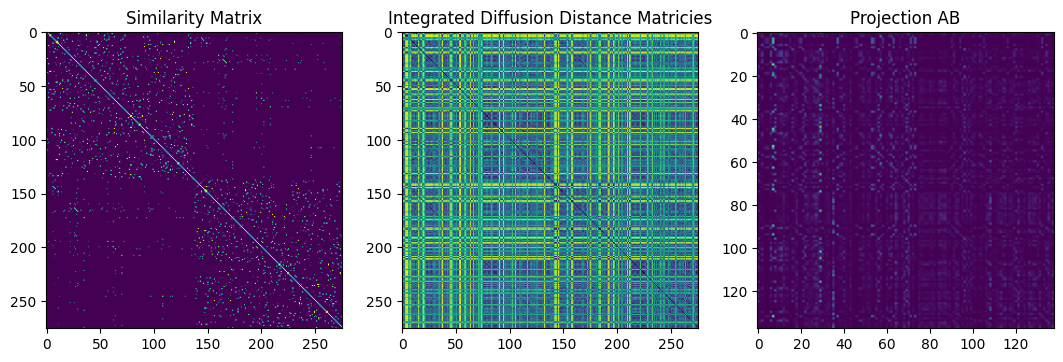

In [19]:
mclass.plot_heat_maps()

Cross Embedding: 0.7463768115942029
FOSCTTM: 0.058181054400336066


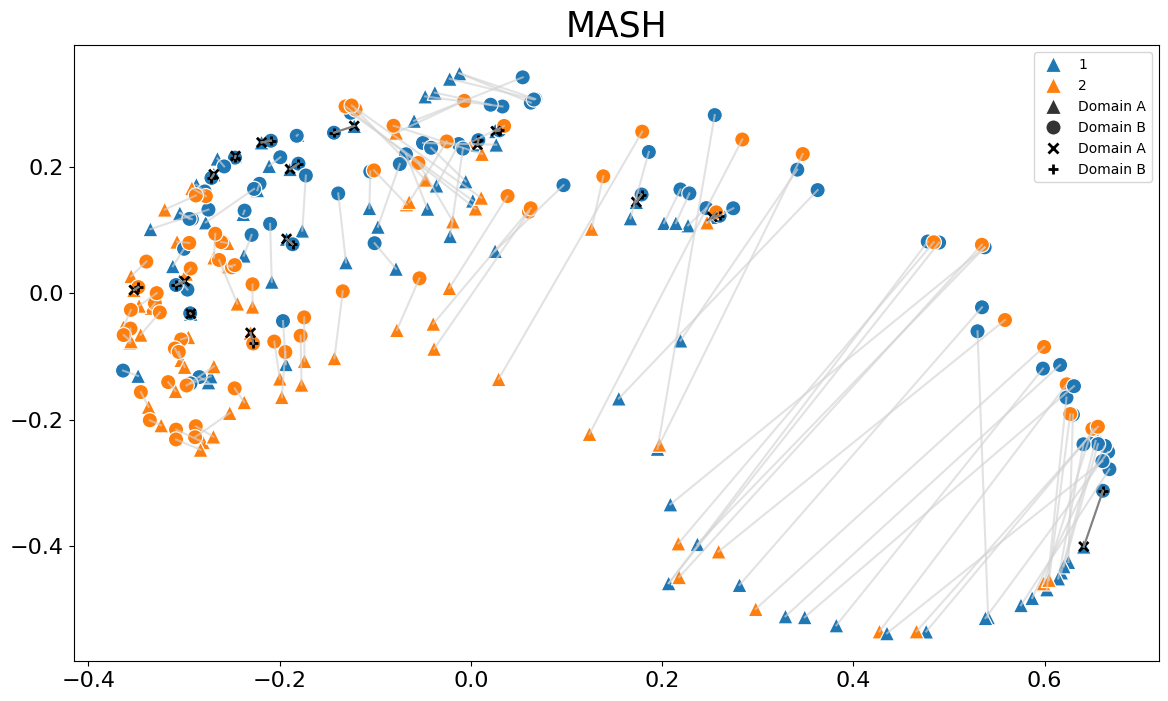

In [20]:
mclass.plot_emb(labels = dcG.labels_doubled)

## Time Tests

In [1]:
from MASH import MASH
import test_manifold_algorithms as tma

dc3 = tma.test_manifold_algorithms(csv_file="iris.csv", split = "distort", percent_of_anchors= [0.2], verbose = 2, random_state= 42)

2024-07-31 11:08:53.509277: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-31 11:08:53.514963: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-31 11:08:53.617620: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-31 11:08:55.576053: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT



 
 
---------------------------       Initalizing class with iris.csv data       ---------------------------

Creating a mirror dataset and distorting the features in the second Domain
Split A features shape: (150, 4)
Split B Features shape (150, 4)
MDS initialized with 4 components
The knn values are: (2, 6, 10, 14, 18, 22, 26, 30, 34, 38)


In [2]:
mclass = MASH(t = -1, knn = 5, distance_measure_A="default",  distance_measure_B="euclidian", DTM = "log", verbose = 4)
mclass.fit(dc3.split_A, dc3.split_B, dc3.anchors[:15])

Time Data Below
 Time it took to execute the graph for domain A:  0.08051
 Time it took to compute kernal A:  0.00025
 Time it took to execute SGDM for domain B:  0.00066
 Time it took to execute the graph for domain B:  0.07217
 Time it took to compute merge_graphs function:  0.04825
 Time it took to compute similarity_matrix function:  0.00064
Using optimal t value of 21
 Time it took to compute diffusion process:  0.04865


# Testing With SPUD

In [2]:
from SPUD import SPUD
import test_manifold_algorithms as tma

dc3 = tma.test_manifold_algorithms(csv_file="seeds.csv", split = "distort", percent_of_anchors= [0.2], verbose = 2, random_state= 42)

2024-08-13 15:22:35.008260: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-13 15:22:35.014396: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-13 15:22:35.118625: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-13 15:22:37.707365: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT



 
 
---------------------------       Initalizing class with seeds.csv data       ---------------------------

Creating a mirror dataset and distorting the features in the second Domain
Split A features shape: (199, 7)
Split B Features shape (199, 7)
MDS initialized with 7 components
The knn values are: (2, 6, 10, 14, 18, 22, 26, 30, 34, 38)


## General SPUD tests

Notes about Absolute Value:
1. It seems to really like the "log" aggregation function, and does well with Nama. 
Try this code below:
sclass = SPUD(knn = 5, OD_method="abs", agg_method= "log", distance_measure_A="euclidean", distance_measure_B="euclidean", similarity_measure="nama", use_kernals=False, verbose = 4)
sclass.fit(dc3.split_A, dc3.split_B, dc3.anchors[:3])

Time it took to compute SGDM:  0.0
Time it took to execute graphtools.Graph functions:  0.19
Preforming abs calculations.

Adjusting self.distsA and self.distsB to reflect the similaritiy measure adjustment.
Time it took to execute get_block function:  0.13
<><><><><><><><><><><><><>  Processed Finished  <><><><><><><><><><><><><>
Cross Embedding: 0.8190954773869347
FOSCTTM: 0.000252518875785965


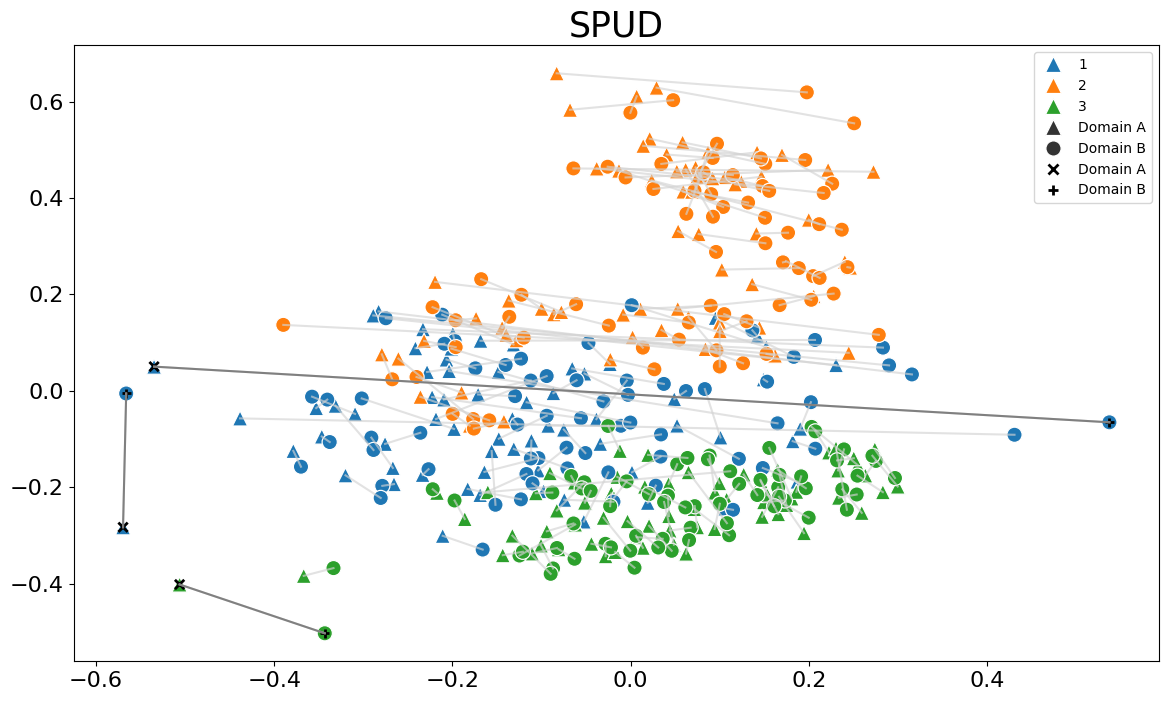

In [9]:
sclass = SPUD(knn = 34, OD_method="abs", agg_method= "log", distance_measure_A="euclidean", distance_measure_B="euclidean", adj_block=True, similarity_measure="default", verbose = 4)
sclass.fit(dc3.split_A, dc3.split_B, dc3.anchors[:3])
sclass.plot_emb(dc3.labels_doubled, show_lines = True, show_anchors = True, show_legend = False, n_comp = 2)

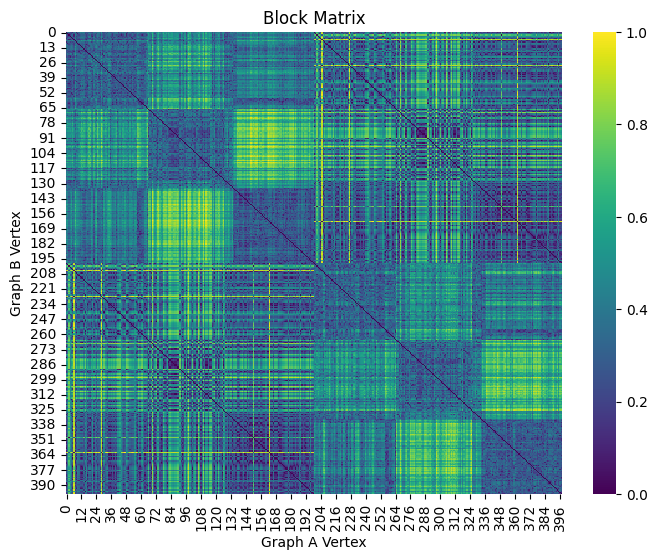

In [10]:
sclass.plot_heat_map()

In [6]:
from Triangular import *

sclass.block[5, 150], 252-150

(0.040883928537368774, 102)

In [7]:
reconstruct_symmetric(sclass.distsA)[5, sclass.known_anchors[:, 0]], reconstruct_symmetric(sclass.distsB)[0, sclass.known_anchors[:, 0]]

(array([0.07609629, 0.17178481, 0.45560112, 0.22828888, 0.21729251]),
 array([0.03521237, 0.03521237, 0.49833022, 0.59011716, 0.47338645]))

In [19]:
import numpy as np

array = np.random.rand(4,4)
array += array.T
array

array([[1.99886107, 1.08795779, 0.61019946, 0.46183036],
       [1.08795779, 1.72414848, 0.62306631, 0.66884068],
       [0.61019946, 0.62306631, 1.45898702, 0.92704874],
       [0.46183036, 0.66884068, 0.92704874, 1.10953727]])

In [26]:
indexed, indices = index_triangular(get_triangular(array), columns = [0,2], return_indices=True)
indexed

array([1.99886107, 0.61019946, 0.62306631, 1.45898702, 1.08795779,
       0.61019946, 0.46183036, 0.92704874])

In [30]:
min = min_bincount(indexed, indices)
min

array([1, 2, 5, 6])

In [31]:
indexed[min]

array([0.61019946, 0.62306631, 0.61019946, 0.46183036])

## Time Tests

In [6]:
dc4 = tma.test_manifold_algorithms(csv_file="optdigits.csv", split = "distort", percent_of_anchors= [0.2], verbose = 2, random_state= 42)
sclass = SPUD(knn = 5, OD_method= "abs", agg_method = "normalize", similarity_measure="nama", verbose = 4)
sclass.fit(dc4.split_A, dc4.split_B, dc4.anchors[:15])
#sclass.plot_emb(dc3.labels_doubled, show_lines = False, show_anchors = False, show_legend = False)


 
 
---------------------------       Initalizing class with optdigits.csv data       ---------------------------

Creating a mirror dataset and distorting the features in the second Domain
Split A features shape: (3823, 64)
Split B Features shape (3823, 64)
MDS initialized with 64 components
The knn values are: (2, 79, 156, 233, 310, 387, 464, 541, 618, 695)
Time it took to compute SGDM:  2.04
Skipping graph creating. Performing nearest anchor manifold alignment (NAMA) instead of SPUD.
Preforming abs calculations.

Time it took to execute get_block function:  1.45
<><><><><><><><><><><><><>  Processed Finished  <><><><><><><><><><><><><>


In [4]:
#Create a results table
import pandas as pd
pd.DataFrame(           columns = ["CSV File", "Feature Shape",  "Anchor Count", "KNN", "SGDM Time", "Graph Time", "Merge Time", "Get Block Time"],
                    data = [[       "optdigits",    (3823, 41),          1500,        2,     1.11,       23.78,       0.01,         29.92 ],
                                    ["optidigits",  (3823, 41),           1500,        500,   1.25,       38.24,     2.37,          1296.43],
                                    ["optidigits",  (3823, 64),           15,           5,    1.38,             25.17,         0.02,          33.32],
    ["optidigits - OD_Method = abs without kernal",  (3823, 64),           15,           5,    2.05,             0.00,         0.00,          1.45],
                                    ["chess",          (3196, 36),        1500,        500,      0.78,         21.51,         1.65,           674.48 ],
                                    ["chess",          (3196, 36),        15,        500,      0.65,         20.33,         1.73,           682.11 ],
                                    ["chess",          (3196, 36),        15,        5,      0.63,         15.47,         0.01,             20.07 ],
                                    ["Waveform",     (5000, 40),         15,        5,        1.92,           58.67,       0.02,               67.54 ],
                                    ["Waveform",     (5000, 40),         1500,        1000,        1.90,     90.78,       6.51,         4924.34],
["Waveform - OD_method = mean with Kernals",     (5000, 40),         1500,        1000,        3.09,       91.16,      0.00,            2.84], #WOW! Look at this craxy time reduction!!!!
["Waveform - OD_method = mean without Kernals",     (5000, 40),         1500,        1000,        3.17,       0.00,      0.00,            2.89], #WOW! Look at this craxy time reduction!!!!
["Waveform - OD_method = mean with shortest path",     (5000, 40),         1500,        1000,        3.16,       89.98,      0.00,            3746.4],

                                    ["Iris",     (150, 4),               150,        148,        0,            0.16,       0.01,         0.18],
                  ["Iris - OD_method = abs without kernals",     (150, 4),               150,        148,        0,            0.0,       0.00,         0.01]])

,CSV File,Feature Shape,Anchor Count,KNN,SGDM Time,Graph Time,Merge Time,Get Block Time
0,optdigits,"(3823, 41)",1500,2,1.11,23.78,0.01,29.92
1,optidigits,"(3823, 41)",1500,500,1.25,38.24,2.37,1296.43
2,optidigits,"(3823, 64)",15,5,1.38,25.17,0.02,33.32
3,chess,"(3196, 36)",1500,500,0.78,21.51,1.65,674.48
4,chess,"(3196, 36)",15,500,0.65,20.33,1.73,682.11
5,chess,"(3196, 36)",15,5,0.63,15.47,0.01,20.07
6,Waveform,"(5000, 40)",15,5,1.92,58.67,0.02,67.54
7,Waveform,"(5000, 40)",1500,1000,1.90,90.78,6.51,4924.34
8,Waveform - OD_method = mean with Kernals,"(5000, 40)",1500,1000,3.09,91.16,0.00,2.84
9,Waveform - OD_method = mean without Kernals,"(5000, 40)",1500,1000,3.17,0.00,0.00,2.89


# Sparse Data Tests

In [6]:
import numpy as np
sparse_dc = tma.test_manifold_algorithms(csv_file="Cancer_Data.csv", split= "skewed", percent_of_anchors= [0.8], verbose=2, random_state=25)
sparse_dc.split_A = sparse_dc.split_A
sparse_dc.split_B = sparse_dc.split_B
#Randomly select points
import random
random_points = random.sample(range(len(sparse_dc.split_A)), k = int(len(sparse_dc.split_A)/10))

#Create the macthing anchors
sparse_dc.anchors = np.array([range(int(len(sparse_dc.split_A)/10)), random_points]).T

#Subset split A to only have some of the points
sparse_dc.split_A = sparse_dc.split_A[random_points]

#Create labels
sparse_labels = np.hstack([sparse_dc.labels[random_points], sparse_dc.labels])


 
 
---------------------------       Initalizing class with Cancer_Data.csv data       ---------------------------

Splitting the data in a skewed fashion
Split A features shape: (569, 15)
Split B Features shape (569, 15)
MDS initialized with 15 components
The knn values are: (2, 14, 26, 38, 50, 62, 74, 86, 98, 110)


In [7]:
sclass = SPUD(knn = 10, OD_method= "abs", agg_method = "normalize", verbose = 3, random_state = 10)
sclass.fit(sparse_dc.split_A, sparse_dc.split_B, sparse_dc.anchors)

/yunity/arusty/.local/lib/python3.10/site-packages/graphtools/graphs.py:122: UserWarning: Building a kNNGraph on data of shape (569, 569) is expensive. Consider setting n_pca.
  warnings.warn(


Preforming abs calculations.

<><><><><><><><><><><><><>  Processed Finished  <><><><><><><><><><><><><>


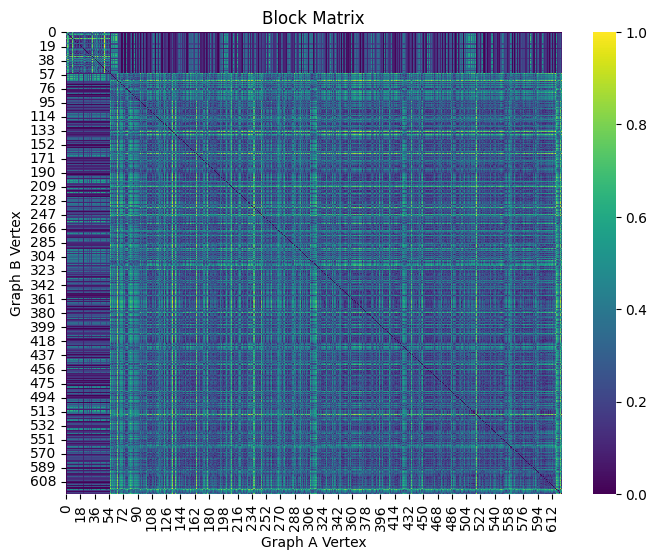

In [8]:
sclass.plot_heat_map()

Cross Embedding: 0.356154280692945
Can't compute FOSCTTM with different domain shapes.


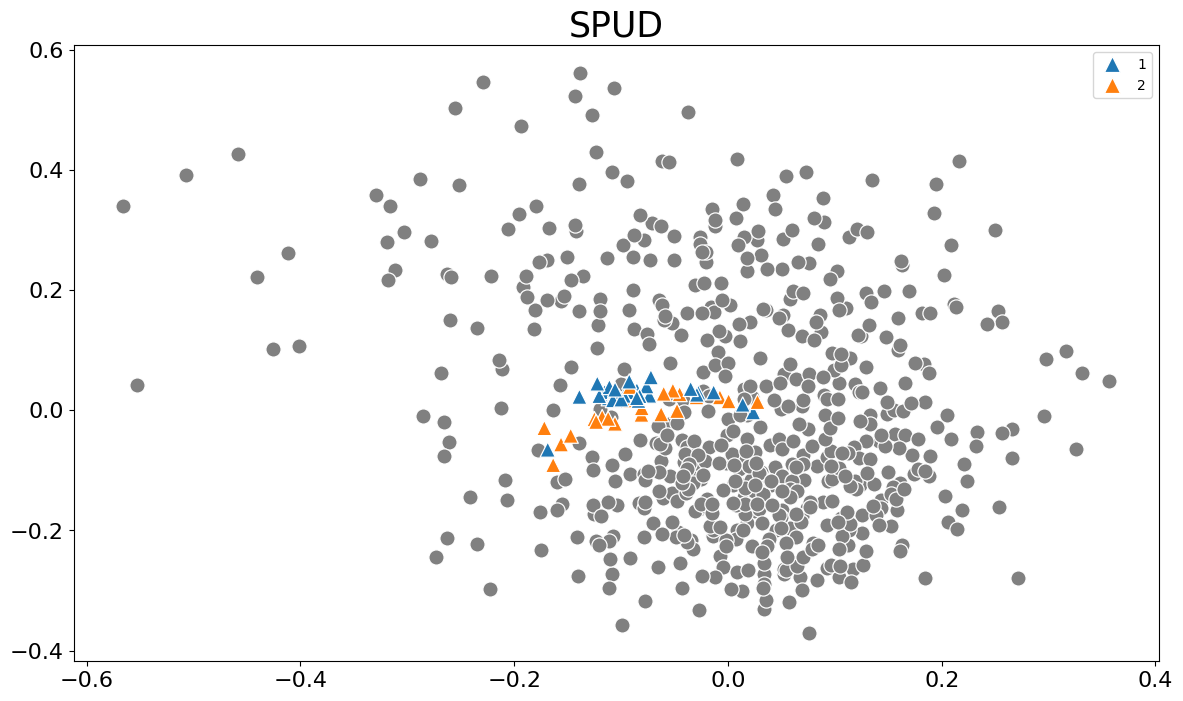

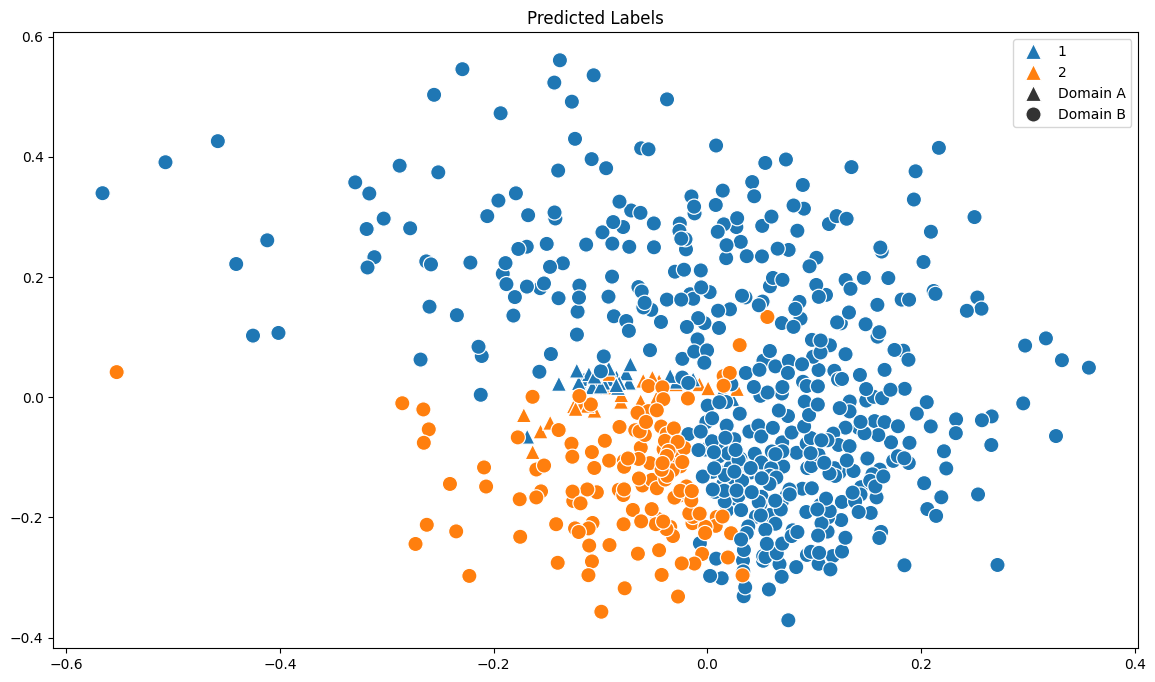

In [9]:
sclass.plot_emb(sparse_labels, show_lines = False, show_anchors = False, show_pred= True)

In [66]:
dclass = MASH(knn = 8, DTM = "log", verbose = 3)
dclass.fit(sparse_dc.split_A, sparse_dc.split_B, sparse_dc.anchors)
dclass.plot_emb(sparse_labels, show_lines = False, show_pred = True, show_legend = False, n_comp = 4)

NameError: name 'MASH' is not defined

In [ ]:
len(B_emb), len(sparse_dc.labels)

(699, 699)

In [49]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors

pca = PCA(n_components=min(len(sparse_dc.split_A[1]), len(sparse_dc.split_B[1])))
A_emb = pca.fit_transform(sparse_dc.split_A)
B_emb = pca.fit_transform(sparse_dc.split_B)

#Initilize model
model = KNeighborsClassifier(n_neighbors = 8)


#Split data and train for split A

model.fit(A_emb, sparse_dc.labels[random_points])
print(f"    Classification Score trained on A {model.score(B_emb, sparse_dc.labels)}")

#Split data and train for split B
try:
    model.fit(B_emb, sparse_dc.labels)
    print(f"    Classification Score trained on B {model.score(A_emb, sparse_dc.labels[random_points])}")
except:
    print(f"    Classification Score trained on B Failed")

    Classification Score trained on A 0.9642346208869814
    Classification Score trained on B 0.9130434782608695
